In [1]:
import numpy as np
from scipy.stats import norm, multivariate_normal
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact
%matplotlib inline

In [2]:
plt.style.use('ggplot')
np.random.seed(123)

In [3]:
mu= np.array([1,2])
cov =np.array([[1,0.7],[0.7,1]])

In [4]:
x = np.arange(-2,4,0.01)
y = np.arange(-1,5,0.01)
X,Y =np.meshgrid(x,y)
pos=np.zeros([X.shape[0],X.shape[1],2])
pos[:,:,0]=X
pos[:,:,1]=Y

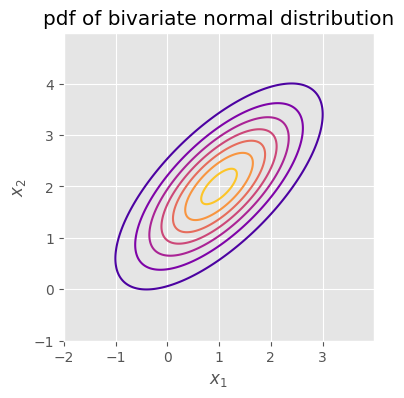

In [5]:
rv=multivariate_normal(mu,cov)
plt.figure(figsize=(4,4))
plt.contour(X,Y,rv.pdf(pos),cmap="plasma")
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('pdf of bivariate normal distribution')
plt.show()

In [6]:
NMCS=500
siga12=cov[1,0]
sigma1=cov[0,0]**0.5
sigma2=cov[1,1]**0.5
rho=siga12/(sigma1*sigma2)
z1=0
z2=0
z1_mcs=[z1]
z2_mcs=[z2]
for i in range(NMCS):
    z1=norm.rvs(loc=rho*z2,scale=(1-rho**2)**0.5)
    z1_mcs.append(z1)
    z2_mcs.append(z2)
    z2=norm.rvs(loc=rho*z1,scale=(1-rho**2)**0.5)
    z1_mcs.append(z1)
    z2_mcs.append(z2)
df1=pd.DataFrame(mu[0]+np.array(z1_mcs)*sigma1)
df2=pd.DataFrame(mu[1]+np.array(z2_mcs)*sigma2)


In [7]:
df1.head()

,0
0,1.000000
1,0.224705
2,0.224705
3,1.320765
4,1.320765


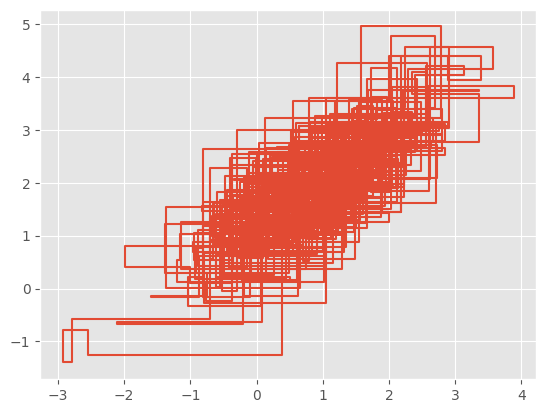

In [8]:
plt.plot(df1[0],df2[0],label='MCS')

In [10]:
@interact(mcs=(0,100,1))
def animation(mcs=0):
    plt.contour(X,Y,rv.pdf(pos),cmap="plasma")
    plt.xlim([-3,4.5])
    plt.ylim([-1,5])
    plt.plot(df1[0][:mcs],df2[0][:mcs],label='MCS')
    plt.show()

interactive(children=(IntSlider(value=0, description='mcs'), Output()), _dom_classes=('widget-interact',))